In [ ]:
#upload pyspark
!apt-get update

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz

!tar xf spark-2.3.1-bin-hadoop2.7.tgz

!pip install -q findspark



import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"



!ls



import findspark

findspark.init()



import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate() 

spark


In [2]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [3]:
!java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [4]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

In [5]:
sc=spark.sparkContext

In [7]:
#load the data of the combined 10 datasets of movies descriptions in txt format

the_data= "netflix.txt"
netflix_rdd=sc.textFile(the_data)

In [18]:

#Remove Punctuation and Transform All Words to Lowercase

def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-–'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [19]:
netflix_rdd = netflix_rdd.map(lower_clean_str)


In [20]:
#Split sentence into list of words
netflix_rdd = netflix_rdd.flatMap(lambda satir: satir.split(" "))

In [21]:
#nospaces

netflix_rdd=netflix_rdd.filter(lambda x:x!='')


In [22]:
#counts word


netflix_count=netflix_rdd.map(lambda  word:(word,1))

In [23]:

netflix_count_RBK=netflix_count.reduceByKey(lambda x,y:(x+y)).sortByKey()

In [24]:
netflix_count_RBK=netflix_count_RBK.map(lambda x:(x[1],x[0]))

In [25]:
import nltk
nltk.download ('stopwords')
from nltk.corpus import stopwords
stopwords =stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
netflix_count_RBK=netflix_count_RBK.filter(lambda x: x[1] not in stopwords).sortByKey(False)

netflix_count_RBK.sortByKey(False).take(20)

[(536, 'life'),
 (467, 'new'),
 (464, 'young'),
 (374, 'love'),
 (361, 'man'),
 (346, 'family'),
 (335, 'world'),
 (292, 'woman'),
 (289, 'friends'),
 (279, 'series'),
 (257, 'two'),
 (255, 'one'),
 (251, 'documentary'),
 (221, 'find'),
 (217, 'must'),
 (212, 'school'),
 (202, 'help'),
 (201, 'finds'),
 (189, 'lives'),
 (183, 'years')]

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(rc=custom_params, palette = 'pastel')

In [65]:
deptDF = spark.createDataFrame(netflix_count_RBK, schema = ['Count', 'Word'])
pandasDF = deptDF.toPandas()
pandasDF.groupby(['Word']).sum().sort_values('Count', ascending = 0)[:10]

,Count
Word,
life,536
new,467
young,464
love,374
man,361
family,346
world,335
woman,292
friends,289


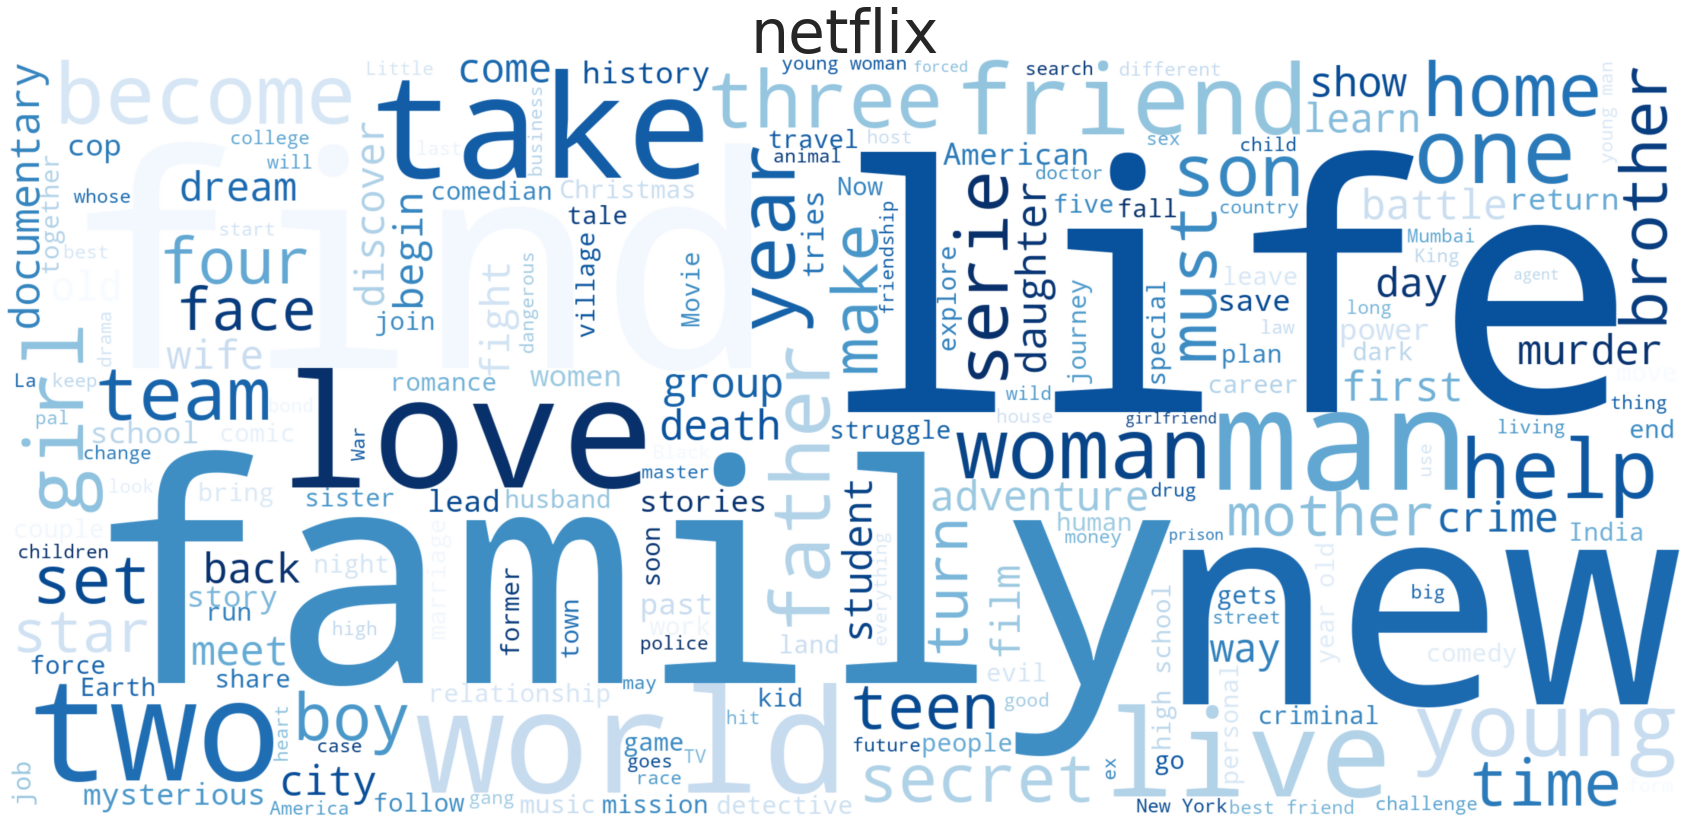

In [82]:
#wordcloud
netf = open("netflix.txt").read()
word_cloud = WordCloud(width = 2200,
                       height = 1000,
                       colormap = 'Blues', 
                       max_font_size = 450, min_font_size = 15,  
                       background_color = "white").generate(netf)

plt.figure(figsize = (30, 25))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.title("Wordcloud for netflix",fontdict = {'fontsize' : 60})
plt.axis("off")
plt.show()